## Plotting

Some preliminaries...

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import welly
welly.__version__

'0.4.4'

## Load a well and add deviation and a striplog

Use the `from_las()` method to load a well by passing a filename as a `str`. 

This is really just a wrapper for `lasio` but instantiates a `Header`, `Curve`s, etc.

In [2]:
from welly import Well

In [3]:
w = Well.from_las('P-130_out.LAS')

In [4]:
w.data.keys()

dict_keys(['CALI', 'DT', 'NPHI_SAN', 'NPHI_LIM', 'NPHI_DOL', 'DPHI_LIM', 'DPHI_SAN', 'DPHI_DOL', 'M2R9', 'M2R6', 'M2R3', 'M2R2', 'M2R1', 'GR', 'SP', 'PEF', 'DRHO', 'RHOB'])

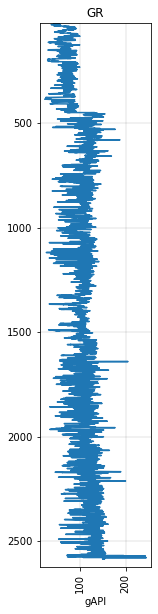

In [5]:
w.data['GR'].plot()

Load a deviation survey.

In [6]:
dev = np.loadtxt('P-130_deviation_survey.csv', delimiter=',', skiprows=1)
w.location.add_deviation(dev[:, :3], td=2618.3)
w.location.md2tvd(2000)

array(1998.17950533)

Add a striplog.

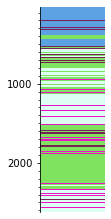

In [7]:
from striplog import Legend, Striplog
legend = Legend.builtin('NSDOE')
strip = Striplog.from_image('P-130_25_2618.png', 25, 2618, legend=legend)
strip.plot(aspect=2)

In [8]:
w.data['strip'] = strip

## Basic plot

We want to use a legend so we get the striplog to look right:

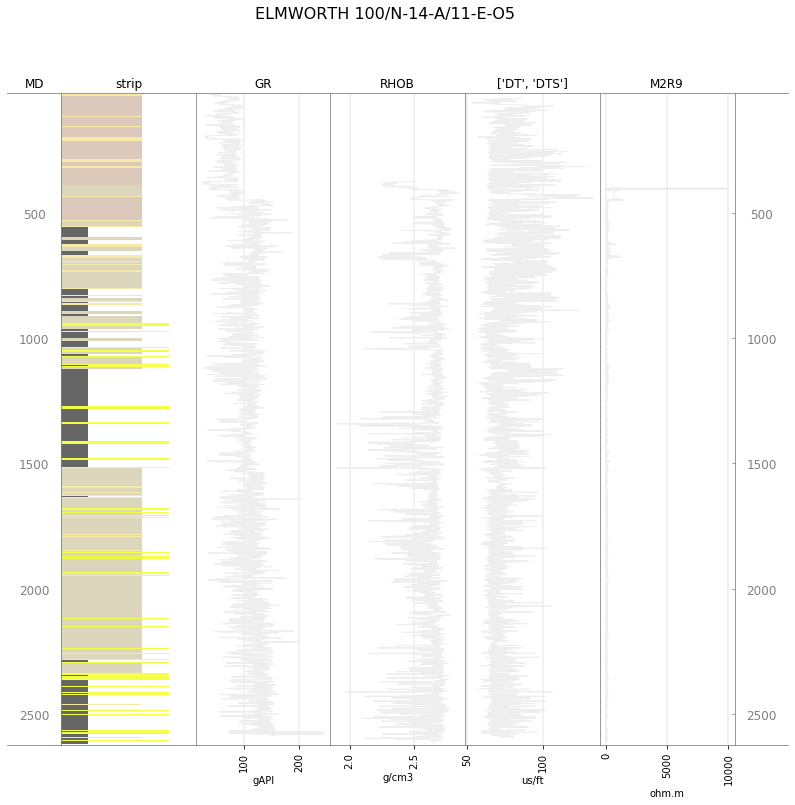

In [9]:
tracks = ['MD', 'strip', 'GR', 'RHOB', ['DT', 'DTS'], 'M2R9', 'MD']
w.plot(tracks=tracks, legend=legend)

The legend doesn't have entries for the curves, so they are grey. 

Let's add some.

In [10]:
curve_legend_csv = """colour,lw,ls,xlim,xscale,curve mnemonic
#ff0000,1.0,-,"0,200",linear,GR
blue,1.0,-,,linear,RHOB
#00ff00,1.0,--,,linear,DT
#ffff00,1.0,--,,linear,DTS
black,1.0,,,log,M2R9
"""
curve_legend = Legend.from_csv(text=curve_legend_csv)

In [11]:
complete_legend = legend + curve_legend

In [12]:
complete_legend[-6:]

Legend(Decor({'_colour': '#666666', 'width': 1.0, 'component': Component({'lithology': 'mudstone', 'colour': 'grey'}), 'hatch': None})
Decor({'_colour': '#ff0000', 'lw': 1.0, 'ls': '-', 'xlim': '0,200', 'xscale': 'linear', 'curve': Component({'mnemonic': 'gr'}), 'width': None, 'hatch': None})
Decor({'_colour': '#0000ff', 'lw': 1.0, 'ls': '-', 'xscale': 'linear', 'curve': Component({'mnemonic': 'rhob'}), 'width': None, 'hatch': None})
Decor({'_colour': '#00ff00', 'lw': 1.0, 'ls': '--', 'xscale': 'linear', 'curve': Component({'mnemonic': 'dt'}), 'width': None, 'hatch': None})
Decor({'_colour': '#ffff00', 'lw': 1.0, 'ls': '--', 'xscale': 'linear', 'curve': Component({'mnemonic': 'dts'}), 'width': None, 'hatch': None})
Decor({'_colour': '#000000', 'lw': 1.0, 'xscale': 'log', 'curve': Component({'mnemonic': 'm2r9'}), 'width': None, 'hatch': None}))

In [13]:
curve_legend.get_decor(w.data['GR'])

colour,#ff0000
lw,1.0
ls,-
xlim,"0,200"
xscale,linear
curve,{'mnemonic': 'gr'}
width,None
hatch,None


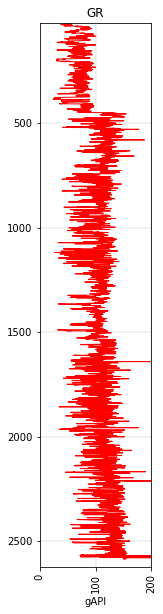

In [14]:
w.data['GR'].plot(legend=curve_legend)

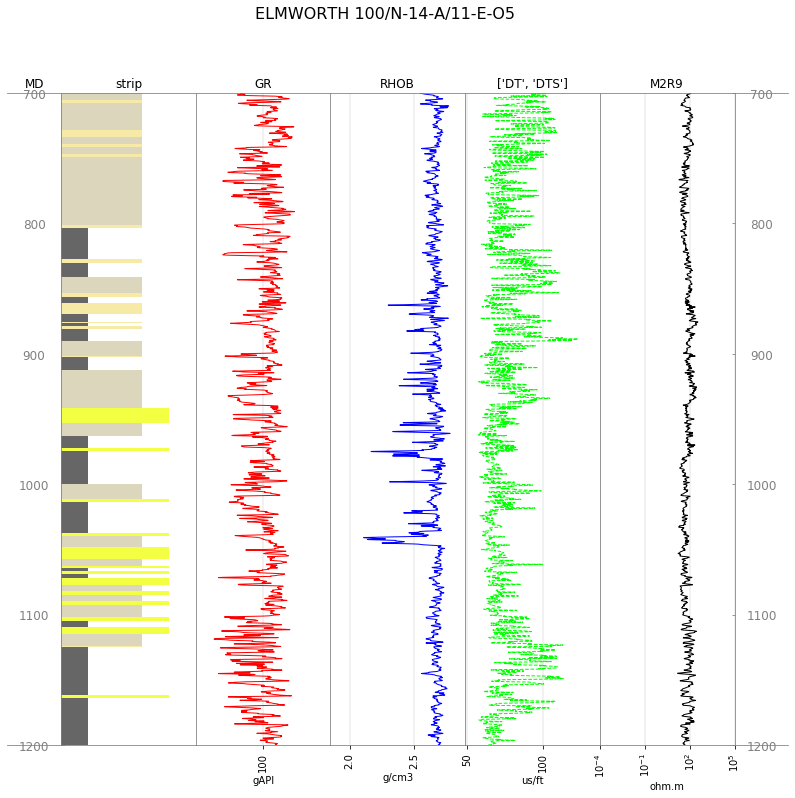

In [15]:
w.plot(tracks=tracks, legend=complete_legend, extents=(700, 1200))

## 2D log plot

A variable density display.

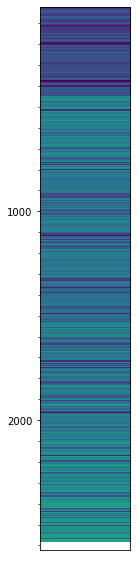

In [16]:
w.data['GR'].plot_2d(cmap='viridis')

IndexError: list index out of range

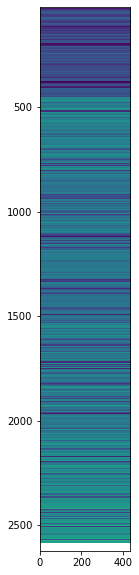

In [17]:
w.data['GR'].plot_2d(curve=True,cmap='viridis')